# PREDICCION DEL EXITO LABORAL EN ESTUDIANTES DE DIFERENTES AREAS DEL CONOCIMIENTO

- Daniel Alejandro Ayala Vallejo 2220084  
- Nelson Felipe Moreno 2220064  
- David Fernando Naranjo 2220046


# Introducción

Nuestra vida como estudiantes es de vital importancia para el desarrollo de la misma, pues en ella aprendemos aspectos sociales, conocimientos e incluso nos define como personas. Desde que somos niños podemos notar que hay un gran numero de diferencias entre nostros y nuestros compañeros, pues como todos sabemos, todos somos diferentes.

Lo que la mayoria ignora es que sin darnos cuenta, el como nos comportemos y el como nos desenvolvamos desde nuestra vida escolar hasta la vida universitaria puede ser un factor determinante en el como nos desempeñaremos en el mundo laboral y en la capacidad que tendremos para conseguir mayores y mejores ofertas laborales.

Este proyecto tiene como objetivo analizar el desempeño academico de estudiantes universitarios de diferentes campos entre los 18 y 30 años, y como dicho desempeño esta relacionado con las oportunidades laborales, nuestra capacidad para ascender dentro de una empresa o incluso la posibilidad de tener mejores salarios dentro del mundo laboral.

# Analisis del Dataset
El dataset escogido para llevar a cabo este proyecto es [Education & Career Success](https://www.kaggle.com/datasets/adilshamim8/education-and-career-success), en el cual podremos encontrar datos de 5.000 estudiantes de difentes universidades y diferentes disciplinas. Cada registro de estudiante contiene 20 variables, entre las cuales podremos ver su edad, genero, disciplina, universidad, ranking de universidad, etc.

A continuacion veremos mas a detalle las variables que podemos encontrar para cada estudiante:

| Columna                         | Tipo de Dato            |
| ------------------------------- | ----------------------- |
| **Student_ID**                  | Cualitativo (Nominal) |
| **Age**                         | Cuantitativo (Discreto) |
| **Gender**                      | Cualitativo  (Nominal)  |
| **High_School_GPA**             | Cuantitativo  (Continuo)  |
| **SAT_Score**                   | Cuantitativo  (Discreto)  |
| **University_Ranking**          | Cuantitativo (Discreto) |
| **University_GPA**              | Cuantitativo  (Continuo)  |
| **Field_of_Study**              | Cualitativo  (Nominal)  |
| **Internships_Completed**       | Cuantitativo (Discreto) |
| **Projects_Completed**          | Cuantitativo (Discreto) |
| **Certifications**              | Cuantitativo (Discreto) |
| **Soft_Skills_Score**           | Cuantitativo  (Discreto)  |
| **Networking_Score**            | Cuantitativo  (Discreto)  |
| **Job_Offers**                  | Cuantitativo (Discreto) |
| **Starting_Salary**             | Cuantitativo  (Continuo)  |
| **Career_Satisfaction**         | Cuantitativo  (Discreto)  |
| **Years_to_Promotion**          | Cuantitativo (Discreto) |
| **Current_Job_Level**           | Cualitativo  (Ordinal)  |
| **Work_Life_Balance**           | Cuantitativo  (Discreto)  |
| **Entrepreneurship**            | Cualitativo  (Nominal)  |


- Student_ID : Es el identificador unico para estudiante.
- Age : Edad del estudiante.
- Gender: Genero del estudiante.
- High_School_GPA: Es la suma de todas las calificaciones de los cursos a lo largo de la escuela secundaria dividida por el número total de créditos.
- SAT_Score: Calificacion del examen de ingreso a la universidad.
- University_Ranking: Ranking de la universidad.
- University_GPA: Es la suma de todas las calificaciones de los cursos a lo largo de la carrera universitaria dividida por el número total de créditos.
- Field_Of_Study: Campo de estudio.
- Interships_Completes: Intercambios completados.
- Projects_Completed: Proyectos completados.
- Certifications: Cantidad de certificados obtenidos.
- Sotf_Skills_Score: Puntaje de habilidades blandas (Capacidades personales y sociales).
- Networking_Score: Capacidad de crear y mantener relaciones con personas para intercambiar ideas y completar proyectos.
- Job_Offers: Cantidad de ofertas laborales recibidas despues de la graduacion.
- Starting_Salary: Salario del primer trabajo en dolares.
- Career_Satisfaction: Satisfaccion con la carrera.
- Years_to_Promotion: Tiempo que tomo recibir el primer ascenso.
- Current_Job_Level: Nivel actual en el mundo laboral.
- Work_Life_Balance: Balance entre la vida personal y laboral.
- Entrepreneurship: La persona inicia un negocio (Si, no)



In [ ]:
!pip install opendatasets
import opendatasets as od

In [ ]:
dataset_link = 'https://www.kaggle.com/datasets/adilshamim8/education-and-career-success'
od.download(dataset_link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nelsonmoreno03
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/adilshamim8/education-and-career-success


100%|██████████| 118k/118k [00:00<00:00, 132MB/s]

In [ ]:
import os
os.listdir('/content/education-and-career-success')

['education_career_success.csv']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras

# Llamaremos df a nuestro archivo csv
archivo = '/content/education-and-career-success/education_career_success.csv'
df = pd.read_csv(archivo)
df.head(1000)

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S00996,23,Male,3.80,1597,107,2.68,Arts,2,3,2,3,5,5,40600.0,1,4,Entry,8,No
996,S00997,22,Male,3.75,956,476,3.50,Law,0,8,1,3,7,2,59200.0,5,1,Entry,9,No
997,S00998,23,Male,3.60,1139,916,3.57,Arts,1,0,5,10,2,1,48100.0,10,1,Entry,5,No
998,S00999,23,Male,3.89,1257,454,2.46,Law,2,4,5,10,5,3,37300.0,5,4,Entry,8,No


In [ ]:
#Utilizamos la funcion .describe() para obtener estadisticas descriptivas del data set
df.describe()

,Age,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Work_Life_Balance
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,23.442200,2.996978,1253.832000,504.335600,3.020028,1.982200,4.562800,2.512200,5.546000,5.538000,2.488800,50563.540000,5.578000,3.015800,5.482400
std,3.473712,0.575673,203.228954,291.060011,0.576047,1.408219,2.872927,1.703183,2.851159,2.850084,1.711859,14494.958207,2.871997,1.417446,2.883427
min,18.000000,2.000000,900.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25000.000000,1.000000,1.000000,1.000000
25%,20.000000,2.500000,1076.000000,256.000000,2.520000,1.000000,2.000000,1.000000,3.000000,3.000000,1.000000,40200.000000,3.000000,2.000000,3.000000
50%,23.000000,2.990000,1257.000000,501.500000,3.030000,2.000000,5.000000,3.000000,6.000000,6.000000,2.000000,50300.000000,6.000000,3.000000,6.000000
75%,26.000000,3.500000,1432.000000,759.000000,3.510000,3.000000,7.000000,4.000000,8.000000,8.000000,4.000000,60500.000000,8.000000,4.000000,8.000000
max,29.000000,4.000000,1600.000000,1000.000000,4.000000,4.000000,9.000000,5.000000,10.000000,10.000000,5.000000,101000.000000,10.000000,5.000000,10.000000


# Limpieza de datos y Normalizacion

In [ ]:
#Llamamos a la funcion isnull para verificar si hay datos nulos
#Si en alguna fila hay True es porque hay un dato nulo
df.isnull()

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Como podemos ver en la tabla anterior, no hay datos nulos, por lo tanto no sera necesario la eliminacion de filas o de columnas.

Para simplificar el estudio de los datos, por el momento nos centraremos en la columna "Gender". Como podemos ver, dicha columna tiene tres valores posibles, sea 'Male', 'Female' u 'Other', sin embargo 'Other' es muy redundante y poco especifico, por lo tanto a continuacion filtraremos el dataset para aquellas filas en donde el genero sea masculino o femenino.

In [ ]:
# Filtrar solo los géneros 'Male' y 'Female'
df_filtrado = df[df['Gender'].isin(['Male', 'Female'])]

# Guardardamos el nuevo dataset
df_filtrado.to_csv("dataset_filtrado.csv", index=False)

#Ahora veremos cuantos datos del genero masculino tenemos
df_filtrado[df_filtrado["Gender"] == "Male"]

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry,2,No
5,S00006,24,Male,2.40,1600,631,3.78,Law,2,3,2,2,2,1,68400.0,9,2,Entry,8,Yes
6,S00007,27,Male,2.36,1011,610,3.83,Computer Science,0,1,3,3,3,2,55500.0,7,4,Mid,3,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,S04988,23,Male,2.81,1059,611,3.01,Engineering,1,2,0,9,2,1,46200.0,10,5,Entry,1,Yes
4988,S04989,23,Male,2.58,1379,352,2.80,Computer Science,1,1,0,2,5,5,48200.0,6,3,Senior,2,No
4992,S04993,21,Male,3.10,974,109,2.72,Arts,2,9,1,1,8,1,60800.0,10,4,Senior,2,No
4993,S04994,29,Male,2.00,1493,860,3.72,Computer Science,1,5,0,5,5,1,49700.0,6,2,Entry,5,No


In [ ]:
#Vemos cuantos datos del genero femenino tenemos
df_filtrado[df_filtrado["Gender"] == "Female"]

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No
10,S00011,28,Female,2.95,1120,594,2.87,Mathematics,2,7,5,8,1,5,26300.0,9,1,Entry,2,No
11,S00012,25,Female,2.54,1070,236,3.26,Law,2,2,3,2,9,5,35100.0,7,4,Mid,6,Yes
12,S00013,22,Female,2.06,1217,648,2.77,Engineering,2,0,5,2,9,2,42600.0,9,4,Senior,8,No
15,S00016,25,Female,2.60,1023,571,3.61,Computer Science,3,5,2,9,9,3,34500.0,7,4,Senior,3,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,S04995,21,Female,2.65,1539,220,3.88,Mathematics,0,7,3,5,4,4,43000.0,10,5,Executive,5,No
4995,S04996,26,Female,2.44,1258,776,2.44,Arts,3,7,3,8,5,5,31500.0,9,5,Mid,7,No
4996,S04997,18,Female,3.94,1032,923,3.73,Law,0,9,3,6,4,5,41800.0,9,2,Entry,4,No
4997,S04998,19,Female,3.45,1299,720,2.52,Law,3,5,5,6,2,2,49500.0,2,5,Mid,6,No


Para cumplir con los parametros de nomalizacion de un dataset reemplazaremos las variables 'Male' y 'Female' por '0' y '1' respectivamente. Esto lo hacemos pues aunque son valores cualitativos representan dos posibles valores, lo cual se puede interpretar cuantitativamente.

In [ ]:
Gender = {'Male': 0, 'Female': 1}
df = df_filtrado.replace(Gender)
df.head()

<ipython-input-9-eb93d93a8ed2>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df_filtrado.replace(Gender)


,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,0,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
2,S00003,28,1,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No
3,S00004,25,0,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid,5,No
4,S00005,22,0,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry,2,No
5,S00006,24,0,2.40,1600,631,3.78,Law,2,3,2,2,2,1,68400.0,9,2,Entry,8,Yes


Una vez realizada la filtracion de los datos vamos a ver el comportamiento de diferentes datos clasificados por genero a traves de histogramas

Text(0.5, 1.0, 'Histograma de Balance Laboral')

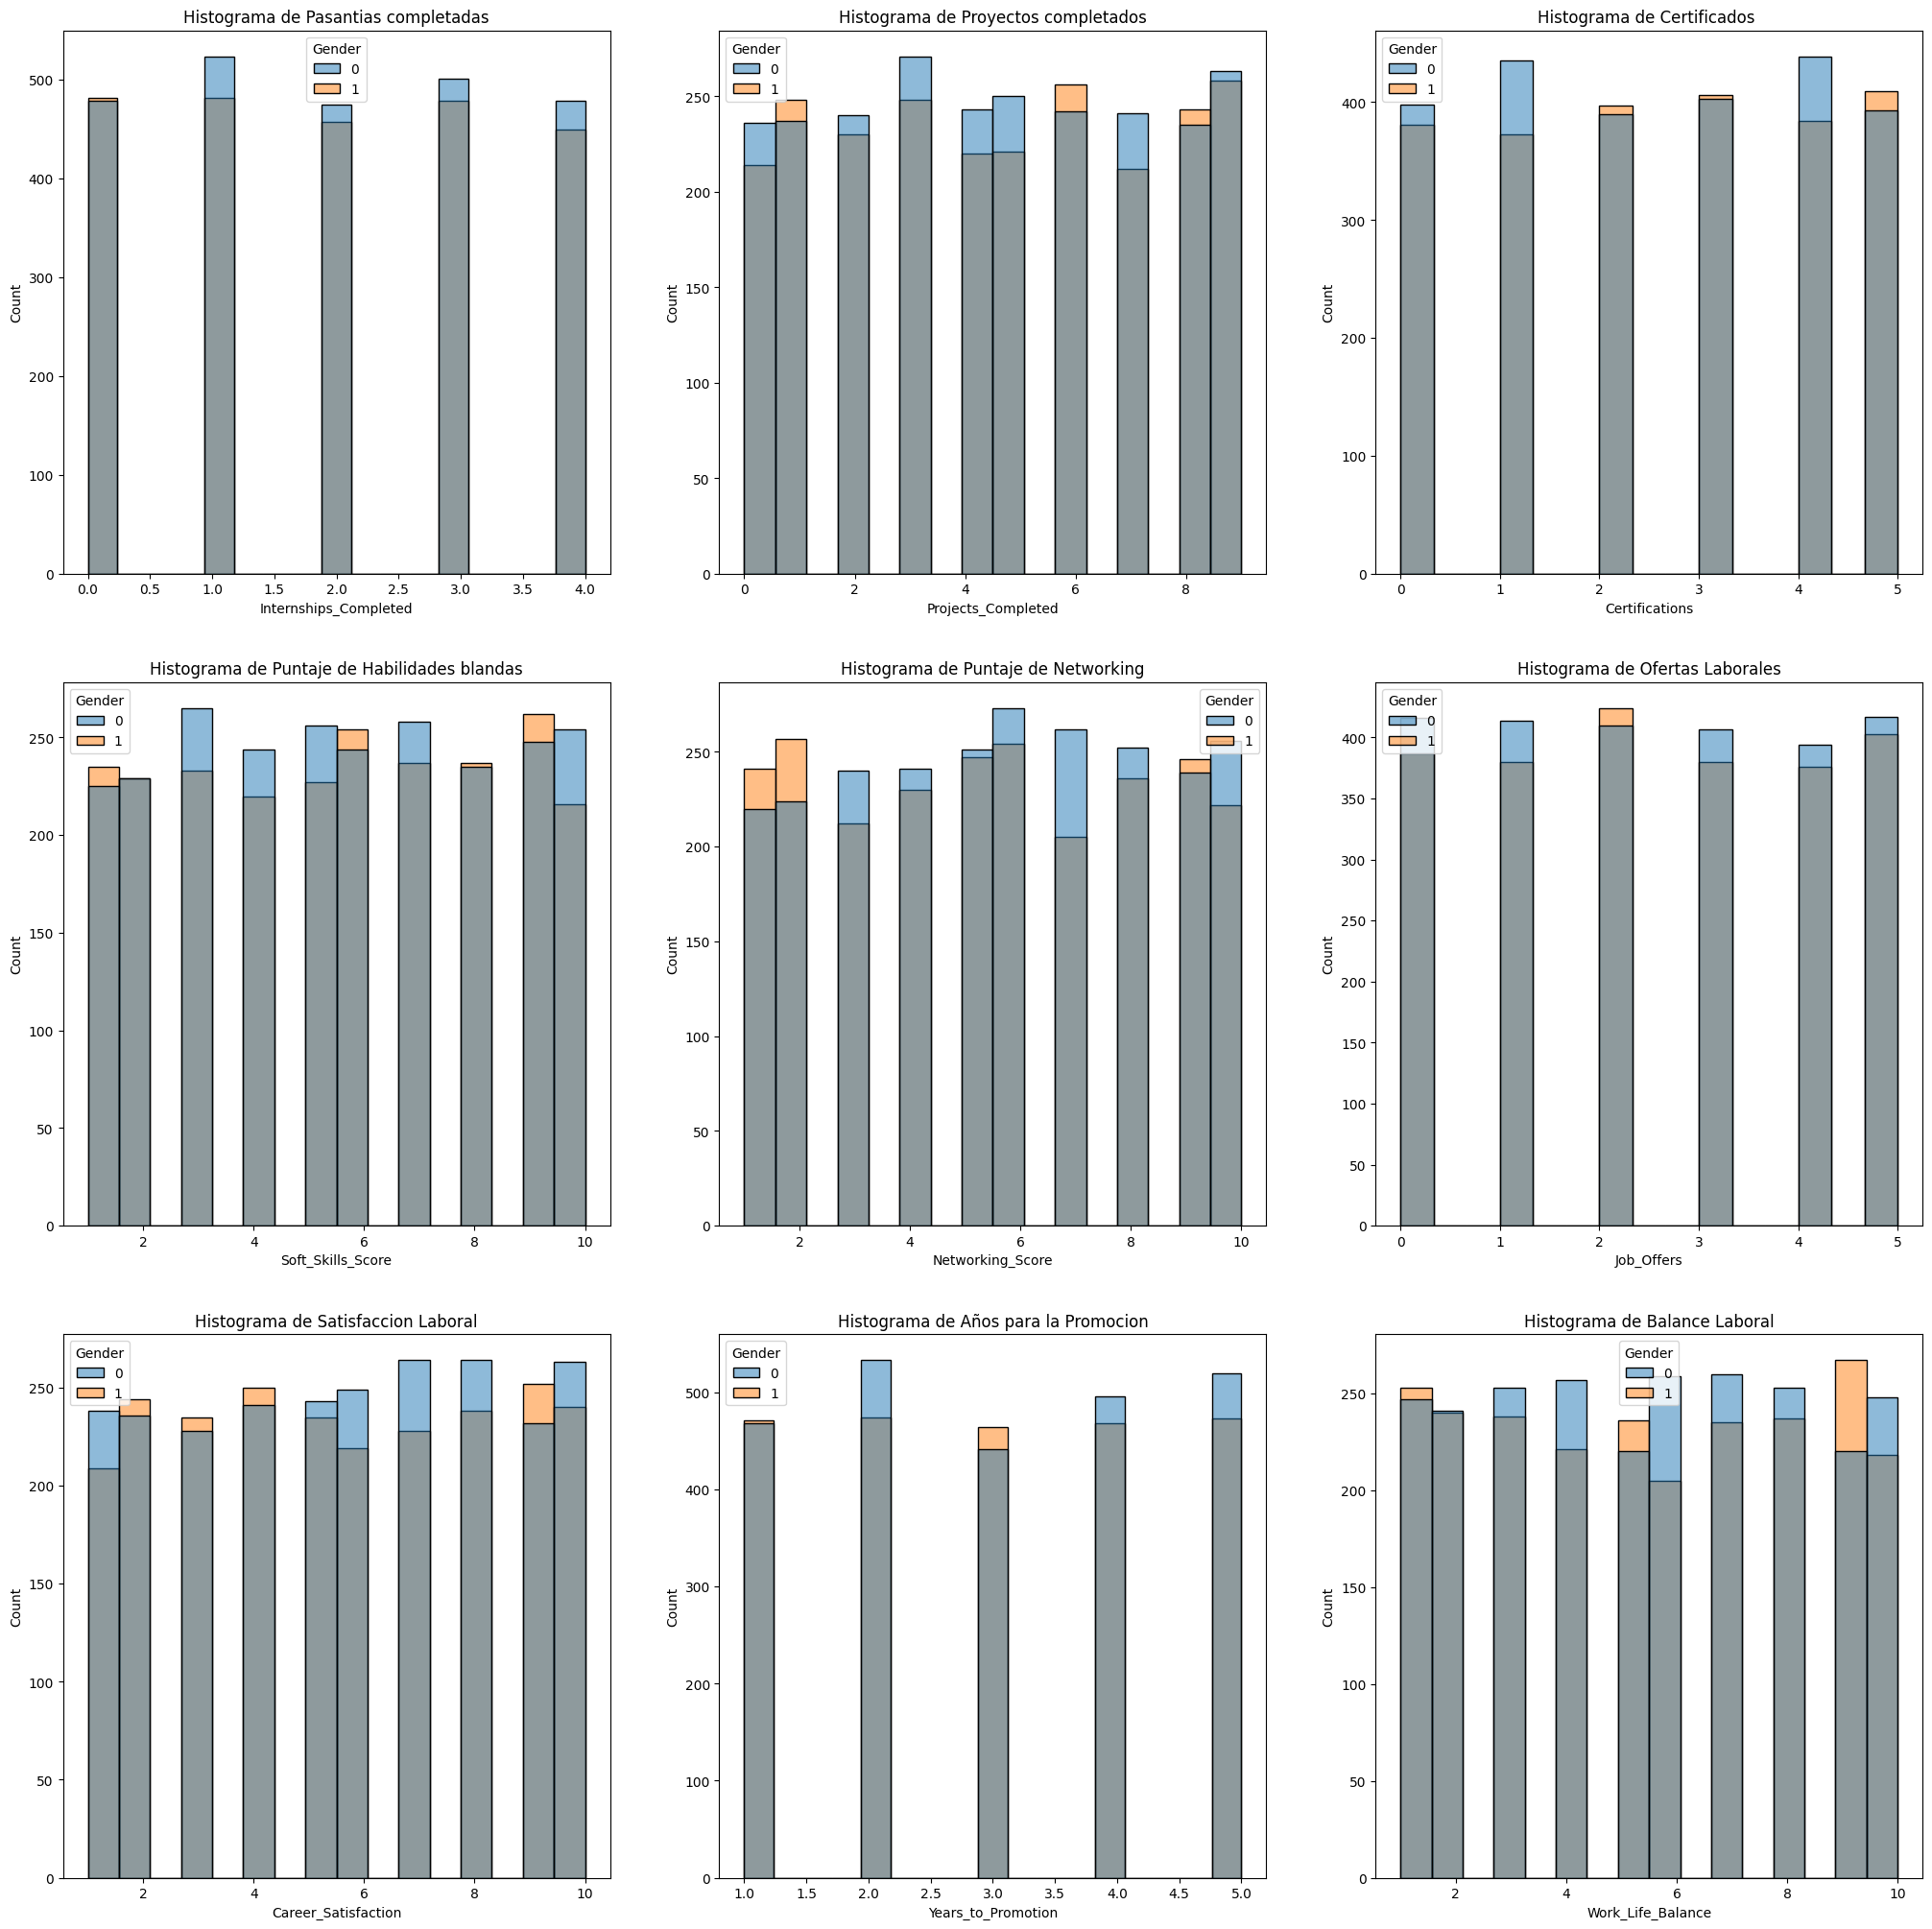

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(25, 25))

sns.histplot(data=df, x='Internships_Completed', hue='Gender', ax=axs[0,0])
axs[0,0].set_title('Histograma de Pasantias completadas')

sns.histplot(data=df, x='Projects_Completed', hue='Gender', ax=axs[0,1])
axs[0,1].set_title('Histograma de Proyectos completados')

sns.histplot(data=df, x='Certifications', hue='Gender', ax=axs[0,2])
axs[0,2].set_title('Histograma de Certificados ')

sns.histplot(data=df, x='Soft_Skills_Score', hue='Gender', ax=axs[1,0])
axs[1,0].set_title('Histograma de Puntaje de Habilidades blandas')

sns.histplot(data=df, x='Networking_Score', hue='Gender', ax=axs[1,1])
axs[1,1].set_title('Histograma de Puntaje de Networking')

sns.histplot(data=df, x='Job_Offers', hue='Gender', ax=axs[1,2])
axs[1,2].set_title('Histograma de Ofertas Laborales')

sns.histplot(data=df, x='Career_Satisfaction', hue='Gender', ax=axs[2,0])
axs[2,0].set_title('Histograma de Satisfaccion Laboral')

sns.histplot(data=df, x='Years_to_Promotion', hue='Gender', ax=axs[2,1])
axs[2,1].set_title('Histograma de Años para la Promocion')

sns.histplot(data=df, x='Work_Life_Balance', hue='Gender', ax=axs[2,2])
axs[2,2].set_title('Histograma de Balance Laboral')



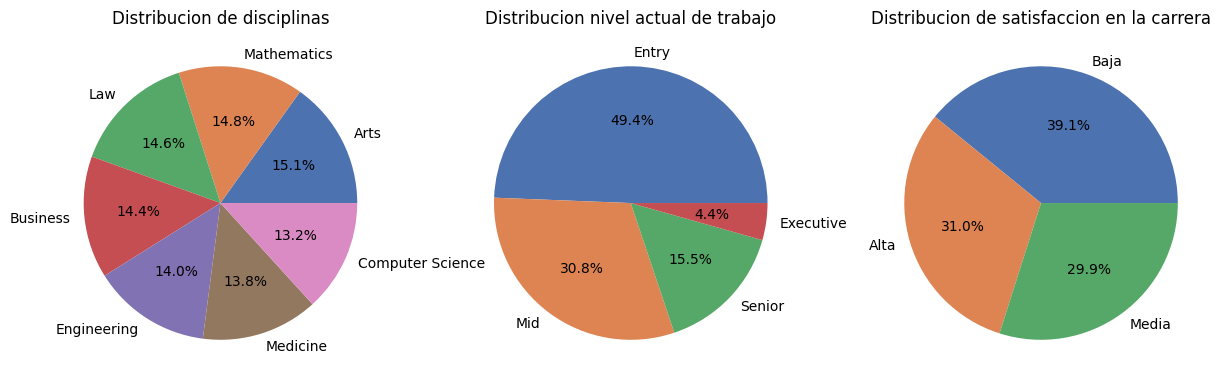

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.pie(x=df['Field_of_Study'].value_counts(), labels=df['Field_of_Study'].value_counts().index,autopct='%1.1f%%', colors=sns.color_palette('deep'))
plt.title('Distribucion de disciplinas')
plt.subplot(1,3,2)
plt.pie(x=df['Current_Job_Level'].value_counts(), labels=df['Current_Job_Level'].value_counts().index,autopct='%1.1f%%', colors=sns.color_palette('deep'))
plt.title('Distribucion nivel actual de trabajo')
plt.subplot(1,3,3)
def categorize_satisfaction(score):
    if score >= 8:
        return "Alta"
    elif score >= 5:
        return "Media"
    else:
        return "Baja"
df["Satisfaction_Level"] = df["Career_Satisfaction"].apply(categorize_satisfaction)
data = df["Satisfaction_Level"].value_counts()
plt.pie(data, labels=data.index, autopct="%1.1f%%", colors=sns.color_palette('deep'))
plt.title("Distribucion de satisfaccion en la carrera")
plt.show()

# **Clasificacion**

Para el conjunto de datos escogido se considera mucho mas viable usar metodos de Machine Learning para la clasificacion de los estudiantes universitarios segun su cargo actual en el trabajo `Current_Job_Level` . En primera instancia debemos asegurarnos de eliminar del dataset columnas que no representen informacion significativa para la clasificacion, informacion que no sea numerica ni categorica.

In [ ]:
df = df.drop("Student_ID", axis=1)
df = df.drop("Entrepreneurship", axis=1)
df = df.drop("Satisfaction_Level", axis=1)

fields = {'Arts': 5, 'Law': 6, 'Engineering':7, 'Medicine':8, 'Business':9, 'Mathematics':10, 'Computer Science':11}
df = df.replace(fields)

Jobs = {'Entry':0, 'Mid':1, 'Senior':2, 'Executive':3}
df = df.replace(Jobs)

df.columns.size

df.head()

,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance
0,24,0,3.58,1052,291,3.96,5,3,7,2,9,8,5,27200.0,4,5,0,7
2,28,1,3.42,1193,715,2.63,8,4,8,1,1,9,0,42400.0,9,3,0,7
3,25,0,2.43,1497,170,2.81,11,3,9,1,10,6,1,57400.0,7,5,1,5
4,22,0,2.08,1012,599,2.48,7,4,6,4,10,9,4,47600.0,9,5,0,2
5,24,0,2.40,1600,631,3.78,6,2,3,2,2,2,1,68400.0,9,2,0,8


Una vez realizada la pequeña limpieza se procedera a utilizar los 3 metodos de clasificacion vistos en clase (Decision tree classifier, Random forest classifier and Support vector machine) con sus parametros predeterminados. Asi mismo se proporcionara la metrica "accuracy" con que finalizan el processo.

Para comenzar, se hara uso del metodo `train_test_split()` para seguir el pipeline recomendado a la hora de realizar clasificacion con ML.

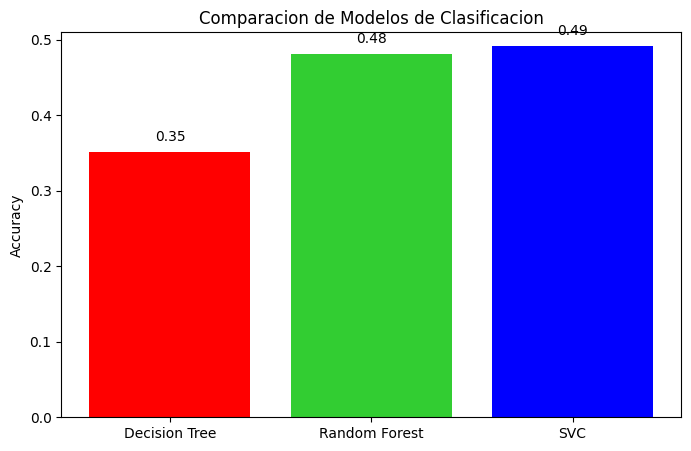

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop("Current_Job_Level", axis=1)
y=np.array(df[df.columns[16]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
est1=DecisionTreeClassifier()
est2=RandomForestClassifier()
est3=SVC(kernel="rbf")

est1.fit(X_train, y_train)
est2.fit(X_train, y_train)
est3.fit(X_train, y_train)

acc_dt = accuracy_score(y_test, est1.predict(X_test))
acc_rf = accuracy_score(y_test, est2.predict(X_test))
acc_svc = accuracy_score(y_test, est3.predict(X_test))

models = ['Decision Tree', 'Random Forest', 'SVC']
accuracies = [acc_dt, acc_rf, acc_svc]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['red', 'limegreen', 'blue'])
plt.ylabel("Accuracy")

plt.title("Comparacion de Modelos de Clasificacion")
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{acc:.2f}", ha='center', va='bottom')

plt.ylim(0, 0.51)
plt.show()


A continuacion se mostraran dos graficas que representaran el porcentaje de importancia para de cada columna a la hora de realizar la prediccion para los metodos de Decision tree y Random forest.

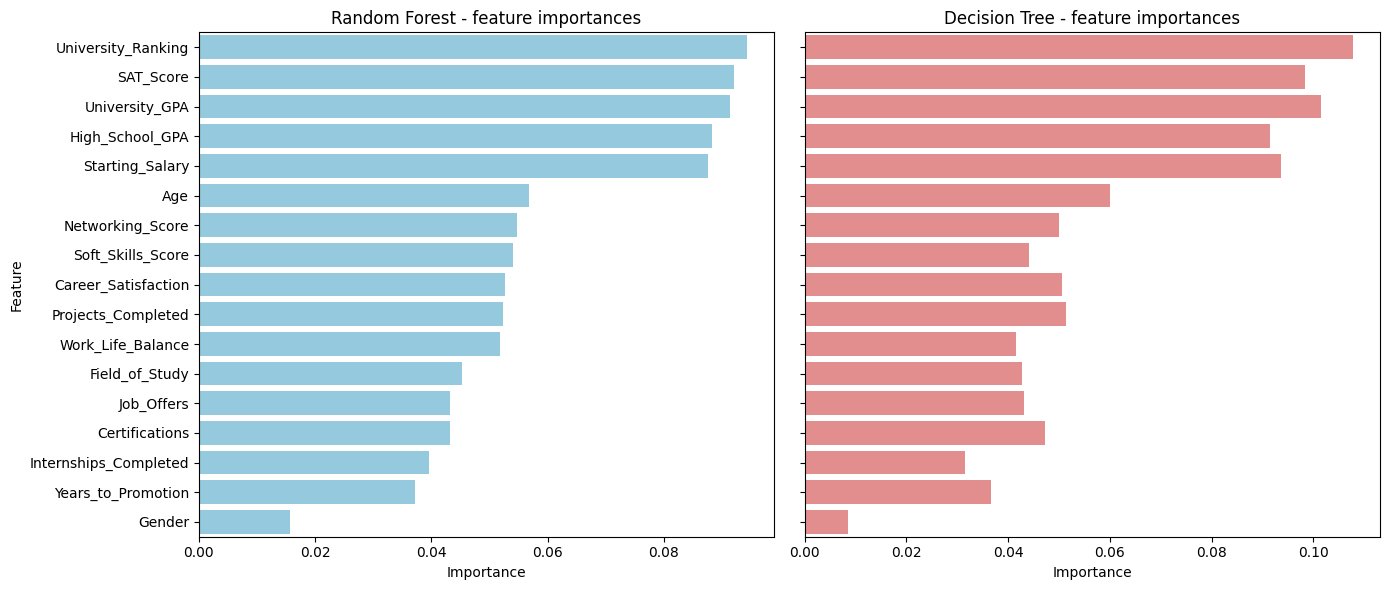

In [ ]:

# Importancia RF
rf_import = pd.DataFrame({'Feature': X.columns, 'Importance': est2.feature_importances_})
rf_import = rf_import.sort_values('Importance', ascending=False)

# Importancia DT
dt_import = pd.DataFrame({'Feature': X.columns, 'Importance': est1.feature_importances_})
dt_import = dt_import.sort_values('Importance', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.barplot(ax=axes[0], x='Importance', y='Feature', data=rf_import, color='skyblue')
axes[0].set_title("Random Forest - feature importances")

sns.barplot(ax=axes[1], x='Importance', y='Feature', data=dt_import, color='lightcoral')
axes[1].set_title("Decision Tree - feature importances")

plt.tight_layout()
plt.show()

### Usando cross validation

Ahora se realizara el mismo procedimiento de clasificacion usando los mismos 3 metodos anteriores pero haciendo uso a su vez de la funcion de validacion cruzada `cross_val_score()`.

In [ ]:
s = cross_val_score(est1, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy Decision tree %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est2, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy Random forest %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est3, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy Support vector machine %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy Decision tree 0.339 (+/- 0.02455)
accuracy Random forest 0.478 (+/- 0.01990)
accuracy Support vector machine 0.494 (+/- 0.02588)


## Curvas de aprendizaje

En el siguiente apartado se abordaran las curvas de aprendizaje para los 3 metodos de Machine Learning empleados anteriormente, el objetivo de este procedimiento es encontrar el mejor parametro para cada estimador que logre optimizar de la mejor manera el proceso de clasificacion, obteniendose asi el valor de "accuracy" mas alto.

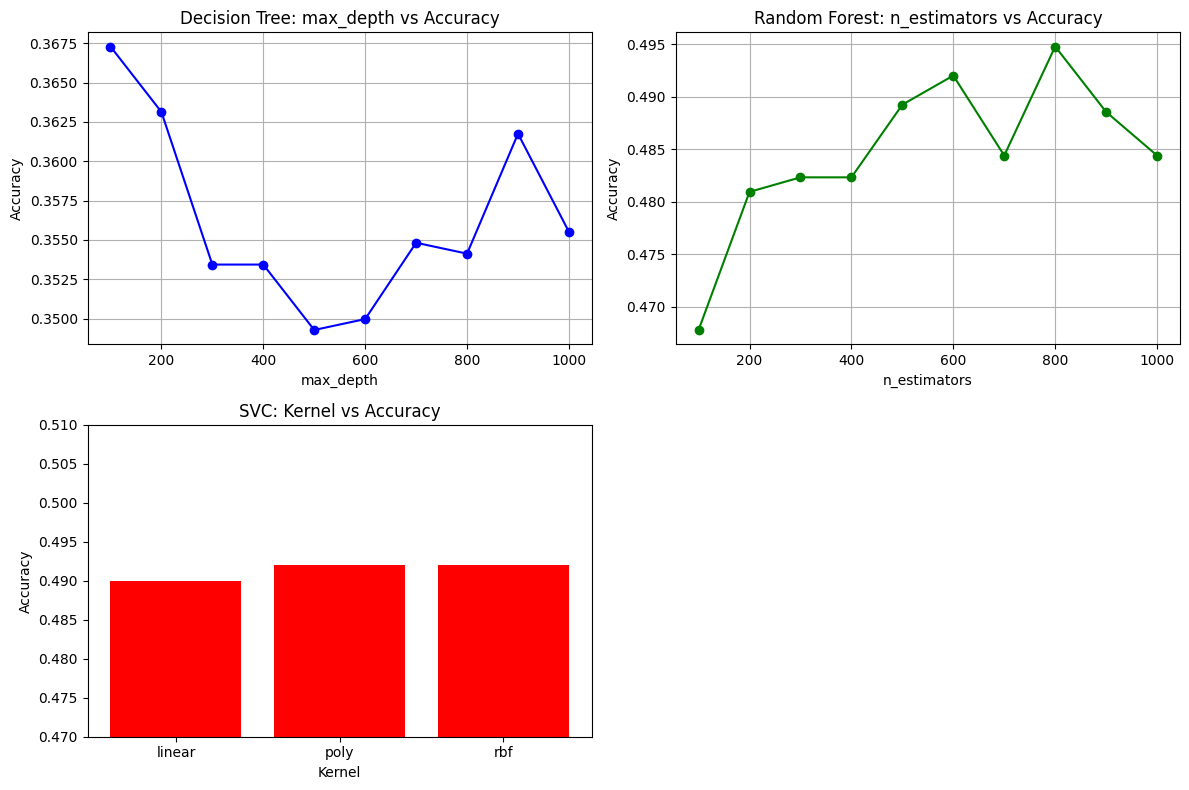

In [ ]:
depths=[]
estima=[]
kernels=["linear","poly","rbf"]
acc1=[]
acc2=[]
acc3=[]

for i in range(100, 1001, 100):
    est1=DecisionTreeClassifier(max_depth=i)
    est2=RandomForestClassifier(n_estimators=i)

    est1.fit(X_train, y_train)
    est2.fit(X_train, y_train)
    est3.fit(X_train, y_train)

    acc_dt = accuracy_score(y_test, est1.predict(X_test))
    acc_rf = accuracy_score(y_test, est2.predict(X_test))

    estima.append(i)
    depths.append(i)
    acc1.append(acc_dt)
    acc2.append(acc_rf)

for i in kernels:
    est3=SVC(kernel=i)
    est3.fit(X_train, y_train)
    acc_svc = accuracy_score(y_test, est3.predict(X_test))
    acc3.append(acc_svc)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].plot(depths, acc1, marker='o', color='blue')
axes[0, 0].set_title('Decision Tree: max_depth vs Accuracy')
axes[0, 0].set_xlabel('max_depth')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].grid(True)

axes[0, 1].plot(estima, acc2, marker='o', color='green')
axes[0, 1].set_title('Random Forest: n_estimators vs Accuracy')
axes[0, 1].set_xlabel('n_estimators')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].grid(True)

axes[1, 0].bar(kernels, acc3, color='red')
axes[1, 0].set_title('SVC: Kernel vs Accuracy')
axes[1, 0].set_xlabel('Kernel')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].set_ylim(0.47, 0.51)

fig.delaxes(axes[1, 1])
plt.tight_layout()
plt.show()



A continuacion se volvera a realizar un procedimiento de curvas de aprendizaje pero unicamente para el metodo Decision tree, utilizando adicionalmente la funcion de validacion cruzada `cross_val_score()` para asi poder obtener el numero de ventana mas apropiado para que al igual se optimice el proceso de clasificacion.

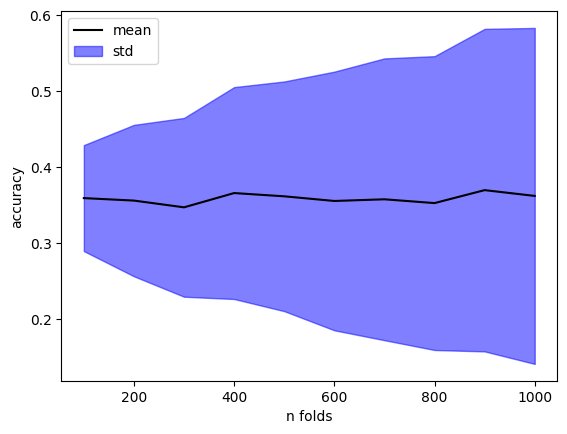

In [ ]:
means, stds = [], []
nfolds_range = range(100, 1001, 100)
for nfolds in nfolds_range:

    s = cross_val_score(est1, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))

means = np.r_[means]
stds  = np.r_[stds]

plt.plot(nfolds_range, means, label="mean", color="black")
plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
plt.xlabel("n folds")
plt.ylabel("accuracy")
plt.legend()

# **DeepLearning**

En ese apartado se construira un perceptron multicapa con distintas configuraciones y se procederan a analizar y visualizar los resultados del proceso de clasificacion para el conjunto de datos recordando que la columna `Current_Job_Level` representa el ground thrut del dataset.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


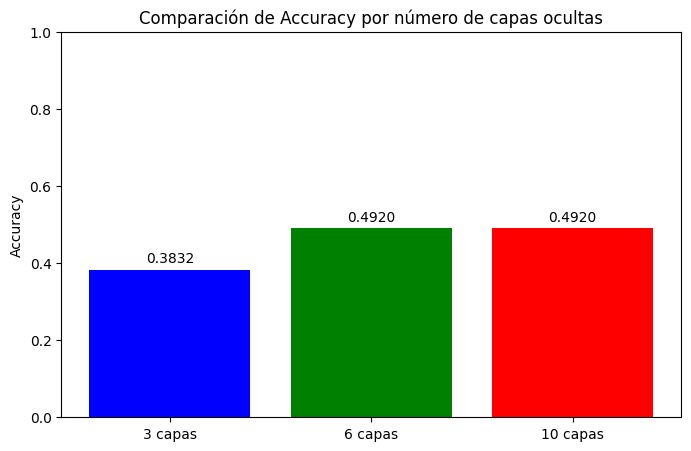

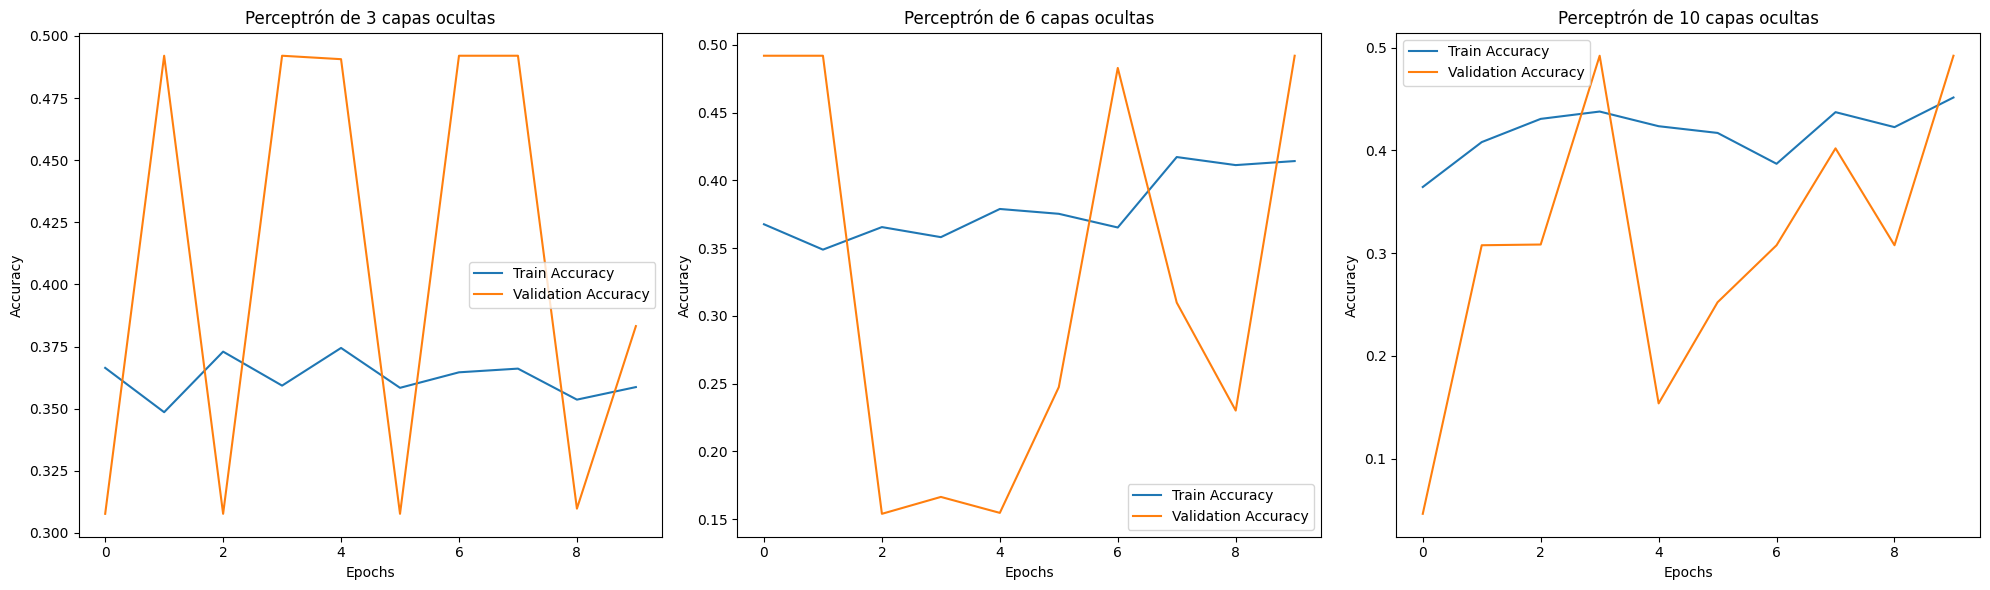

In [ ]:
# Perceptrón de 3 capas ocultas
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
graph1 = model1.fit(X_train,
          y_train,
          epochs=10,
          batch_size=40,
          validation_data=(X_test, y_test),
          verbose=0)

# Perceptrón de 6 capas ocultas
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

graph2 = model2.fit(X_train,
          y_train,
          epochs=10,
          batch_size=40,
          validation_data=(X_test, y_test),
          verbose=0)

# Perceptrón de 10 capas ocultas
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model3.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
graph3 = model3.fit(X_train,
          y_train,
          epochs=10,
          batch_size=40,
          validation_data=(X_test, y_test),
          verbose=0)

accuracy_model1 = graph1.history['val_accuracy'][-1]
accuracy_model2 = graph2.history['val_accuracy'][-1]
accuracy_model3 = graph3.history['val_accuracy'][-1]


models = ['3 capas', '6 capas', '10 capas']
accuracies = [accuracy_model1, accuracy_model2, accuracy_model3]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.ylabel("Accuracy")
plt.title("Comparación de Accuracy por número de capas ocultas")
plt.ylim(0, 1)


for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{acc:.4f}", ha='center', va='bottom')

plt.show()

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

axes[0].plot(graph1.history['accuracy'], label='Train Accuracy')
axes[0].plot(graph1.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Perceptrón de 3 capas ocultas')
axes[0].legend()

axes[1].plot(graph2.history['accuracy'], label='Train Accuracy')
axes[1].plot(graph2.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Perceptrón de 6 capas ocultas')
axes[1].legend()

axes[2].plot(graph3.history['accuracy'], label='Train Accuracy')
axes[2].plot(graph3.history['val_accuracy'], label='Validation Accuracy')
axes[2].set_xlabel('Epochs')
axes[2].set_ylabel('Accuracy')
axes[2].set_title('Perceptrón de 10 capas ocultas')
axes[2].legend()

plt.tight_layout()
plt.show()

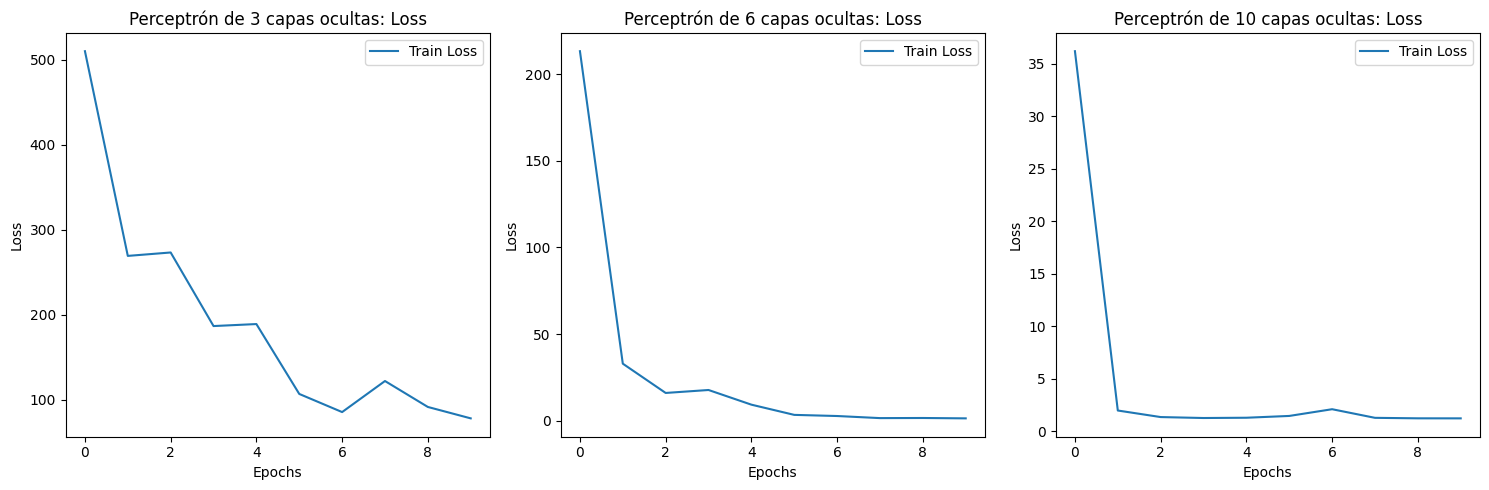

In [ ]:
# Graficar Loss para el perceptrón de 3 capas ocultas
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(graph1.history['loss'], label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Perceptrón de 3 capas ocultas: Loss')
plt.legend()

# Graficar Loss para el perceptrón de 6 capas ocultas
plt.subplot(1, 3, 2)
plt.plot(graph2.history['loss'], label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Perceptrón de 6 capas ocultas: Loss')
plt.legend()

# Graficar Loss para el perceptrón de 10 capas ocultas
plt.subplot(1, 3, 3)
plt.plot(graph3.history['loss'], label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Perceptrón de 10 capas ocultas: Loss')
plt.legend()

plt.tight_layout()
plt.show()

X shape:  (4808, 17) y shape:  (4808,)
X:  (4808, 17)  X_pca:  (4808, 2)


<ipython-input-15-1dd0e88211d4>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


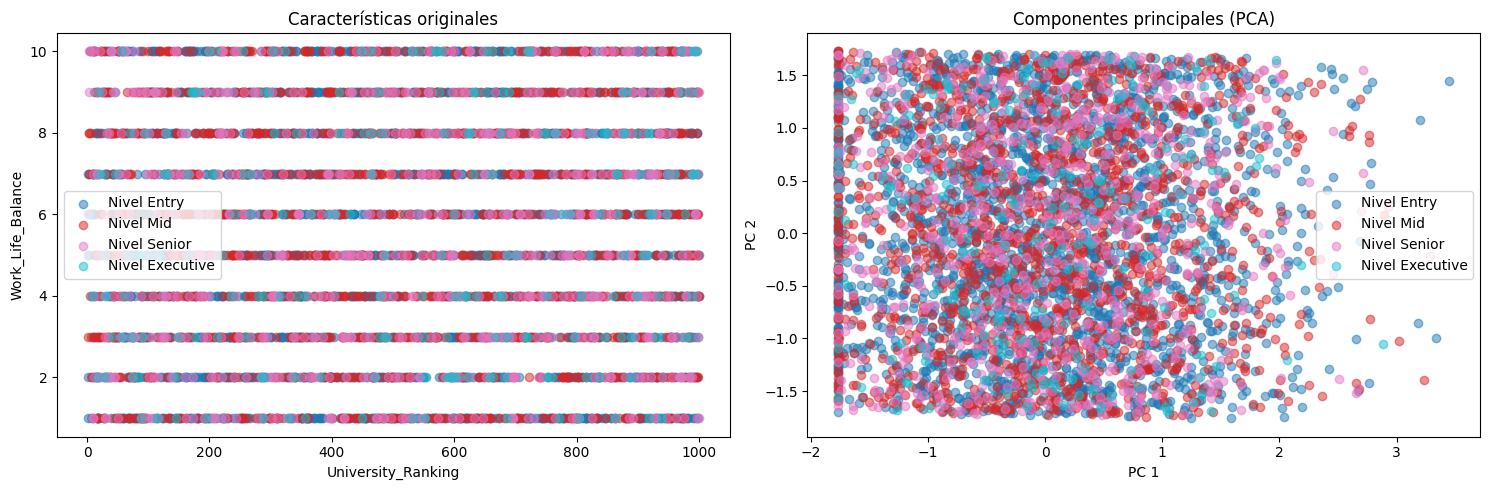

In [ ]:

from sklearn.decomposition import PCA
X = df.drop("Current_Job_Level", axis=1)
y = df["Current_Job_Level"]
print('X shape: ', X.shape, 'y shape: ', y.shape)

pca_df = PCA(n_components=2, whiten=True)
X_pca = pca_df.fit_transform(X)
print('X: ', X.shape, ' X_pca: ', X_pca.shape)

feature1 = 4  #ranking universitario
feature2 = 16
unique_labels = np.unique(y)
colors = plt.cm.get_cmap('tab10', len(unique_labels))
Jobs = ['Entry', 'Mid', 'Senior', 'Executive']


plt.figure(figsize=(15, 5))
plt.subplot(121)
for idx, label in enumerate(unique_labels):
    plt.scatter(
        X[y == label].iloc[:, feature1],
        X[y == label].iloc[:, feature2],
        label=f"Nivel {Jobs[label]}",
        alpha=0.5,
        color=colors(idx)
    )
plt.xlabel(X.columns[feature1])
plt.ylabel(X.columns[feature2])
plt.title("Características originales")
plt.legend()

plt.subplot(122)
for idx, label in enumerate(unique_labels):
    plt.scatter(
        X_pca[y == label, 0],
        X_pca[y == label, 1],
        label=f"Nivel {Jobs[label]}",
        alpha=0.5,
        color=colors(idx)
    )
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("Componentes principales (PCA)")
plt.legend()

plt.tight_layout()
plt.show()


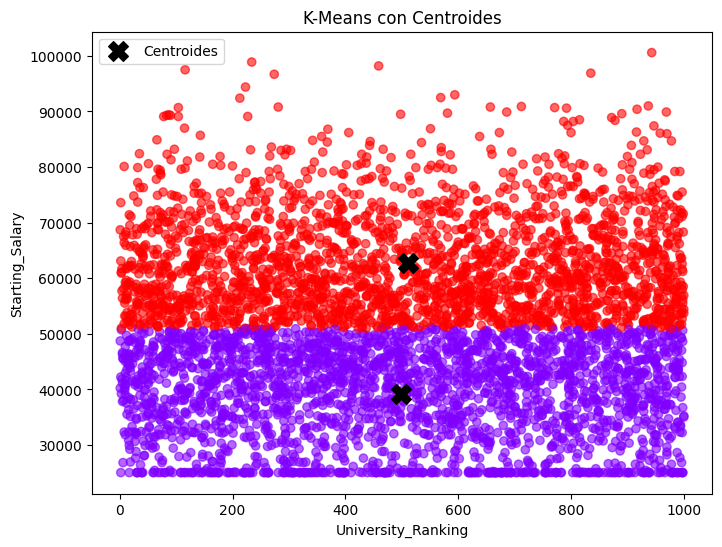

Centroides shape: (2, 17)
Etiquetas shape: (4808,)


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df.drop("Current_Job_Level", axis=1)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

plt.figure(figsize=(8,6))
plt.scatter(X.iloc[:, 4], X.iloc[:, 13], c=kmeans.labels_, cmap='rainbow', alpha=0.6)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 4], centroids[:, 13], color='black', marker='X', s=200, label='Centroides')

plt.xlabel(X.columns[4])   # University_Ranking
plt.ylabel(X.columns[13])  # Starting_Salary
plt.title("K-Means con Centroides")
plt.legend()
plt.show()
print("Centroides shape:", kmeans.cluster_centers_.shape)
print("Etiquetas shape:", kmeans.labels_.shape)


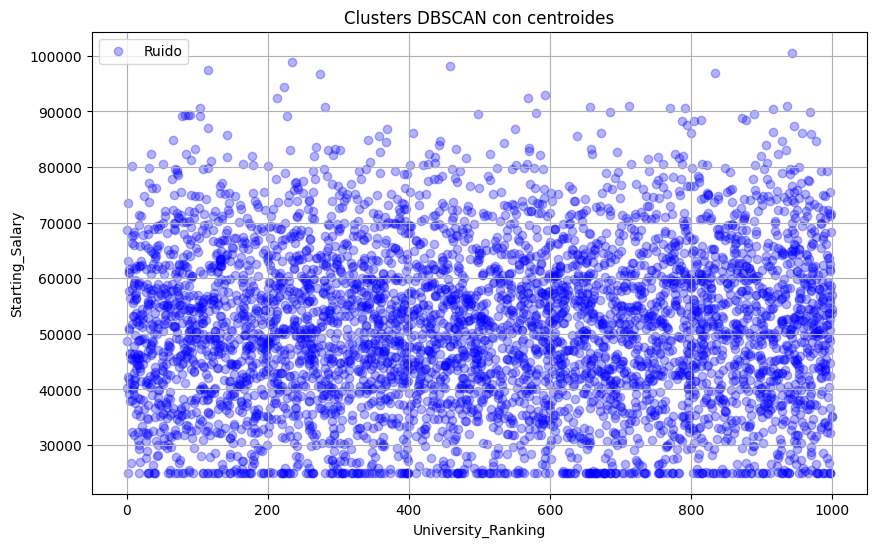

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


# Normalizamos los datos (importante para DBSCAN)
X = df.drop("Current_Job_Level", axis=1)
X_scaled = StandardScaler().fit_transform(X)

# Aplicamos DBSCAN
dbs = DBSCAN(eps=.3,min_samples=2)
dbs.fit(X_scaled)
labels = dbs.labels_

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X.iloc[:,4], X.iloc[:,13], c="blue", cmap='rainbow');
plt.subplot(122)
plt.scatter(X.iloc[:,4],X.iloc[:,13], c=db  s.labels_, cmap='rainbow');